In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
modi = pd.read_csv('narendramodi_tweets.csv')
modi.head(1)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [3]:
#find the first tweet date
min_date = modi['created_at'].min()
min_date

'2016-03-09 12:22:10'

In [4]:
#find the last tweet date
max_date = modi['created_at'].max()
max_date

'2017-01-31 11:00:07'

##### word cloud of text column

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
df = modi['text'].str.lower().str.replace('[^a-z#@ ]','')

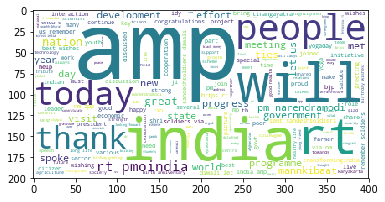

In [7]:
wc = WordCloud(background_color='white').generate(' '.join(df))
plt.imshow(wc)

##### Text cleaning

In [8]:
#stopwards
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','pm','day','tie','rt','https','will'])
#stemming(identifying root word)
stemmer = nltk.stem.PorterStemmer()

In [9]:
#user defined function for data cleaning 
def clean_sentence(text):
    words = text.split(' ')
    word_clean = [word for word in words if word not in stopwords]
    return ' '.join(word_clean)

In [10]:
docs_clean = df.apply(clean_sentence)
len(docs_clean)

3220

In [11]:
docs_clean.head()

0    presidents address wonderfully encapsulated in...
1    rashtrapati jis address houses parliament inde...
2    @pmoindia empowering marginalised httpstcowwsq...
3    @pmoindia commitment welfare farmers httpstcop...
4    @pmoindia improving quality life poor httpstco...
Name: text, dtype: object

##### Create the Data Term Matrix using count vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)

In [14]:
dtm

<3220x1323 sparse matrix of type '<class 'numpy.int64'>'
	with 20827 stored elements in Compressed Sparse Row format>

In [15]:
no_of_zeros = (3220*1228)-24800
sparsity = no_of_zeros / (3220*1228) * 100
sparsity

99.372812430453

In [16]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
df_dtm.head()

,aadhaar,abeshinzo,abhiyan,access,accomplishment,accomplishments,achieve,achievements,across,act,...,years,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngsters,youth,zayed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#column sum 
df_dtm.sum().sort_values(ascending=False).head(10)

india           368
people          204
pmoindia        146
us              144
today           137
narendramodi    129
ties            127
thank           119
wishes          119
ji              118
dtype: int64

##### Cluster the tweets in to 4 groups using k-means clustering 

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dtm)
labels = kmeans.predict(df_dtm)

In [20]:
docs_clean = pd.DataFrame(docs_clean)
docs_clean['label'] = labels

In [21]:
docs_clean['label'].value_counts()

0    2678
1     344
3     157
2      41
Name: label, dtype: int64

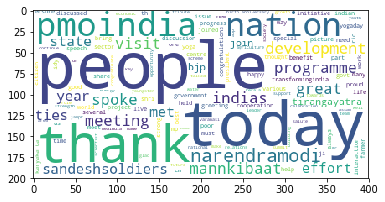

In [22]:
str = ' '.join(docs_clean[docs_clean['label']==0]['text'])
wc = WordCloud(background_color='white').generate(str)
plt.imshow(wc)

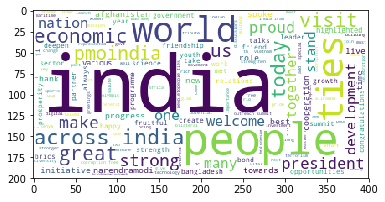

In [23]:
str = ' '.join(docs_clean[docs_clean['label']==1]['text'])
wc = WordCloud(background_color='white').generate(str)
plt.imshow(wc)

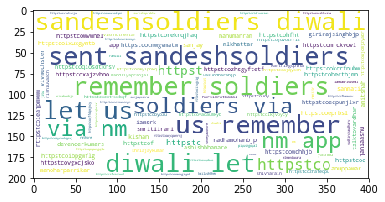

In [24]:
str = ' '.join(docs_clean[docs_clean['label']==2]['text'])
wc = WordCloud(background_color='white').generate(str)
plt.imshow(wc)

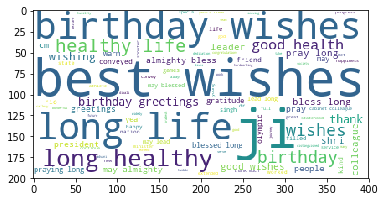

In [25]:
str = ' '.join(docs_clean[docs_clean['label']==3]['text'])
wc = WordCloud(background_color='white').generate(str)
plt.imshow(wc)